In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

train_df=pd.read_csv('data/train.csv')
test_df=pd.read_csv('data/test.csv')

# plt.clf()
# plt.figure(figsize=(15,15))
# sns.heatmap(train_df.corr(),linewidths=0.1,square=True,annot=True)
# plt.savefig('corr')
# plt.show()

## 月份
根据训练集的图像得出前三个月楼市并无波动，甚至有略微下降的趋势。在用XGB模型实则时发现该特征与目标值完全无关。考虑做时序特征，但时间线太短。

        Rental          
          mean       std
Time                    
1     8.096456  6.576679
2     7.937904  6.204733
3     7.858724  6.223443


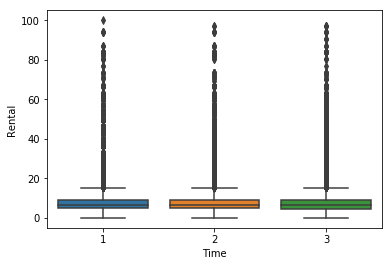

In [46]:
# 楼市总体上在三个月内没有波动
print(train_df.loc[:,['Time','Rental']].groupby(['Time']).agg(['mean','std']))

plt.clf()
sns.boxplot(x='Time',y='Rental',data=train_df)
plt.show()

## 小区

                  Rental           
                    mean        std
Neighborhood                       
3520          100.000000        NaN
6505           93.887946        NaN
6500           93.887946        NaN
1903           81.154499        NaN
1547           73.514431        NaN
3896           73.514431        NaN
6493           70.118846  12.242958
695            69.439728        NaN
628            66.723260        NaN
3288           66.723260        NaN


<Figure size 432x288 with 0 Axes>

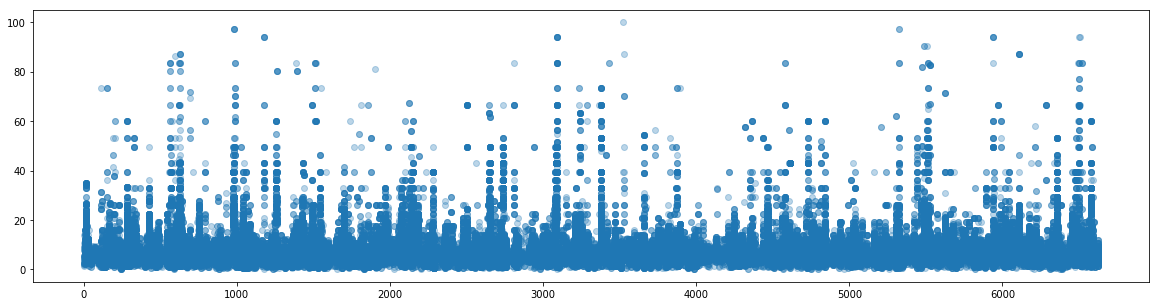

In [38]:
print(train_df.loc[:,['Neighborhood','Rental']].groupby(['Neighborhood']).agg(['mean','std']).sort_values(by=('Rental','mean'),ascending=False).head(10))

plt.clf()
plt.figure(figsize=(20,5))
plt.scatter(x=train_df.loc[:,'Neighborhood'],y=train_df.loc[:,'Rental'],alpha=0.3)
plt.show()

## 出租房屋数
该特征可以体现该小区的租房人数比例。

<Figure size 432x288 with 0 Axes>

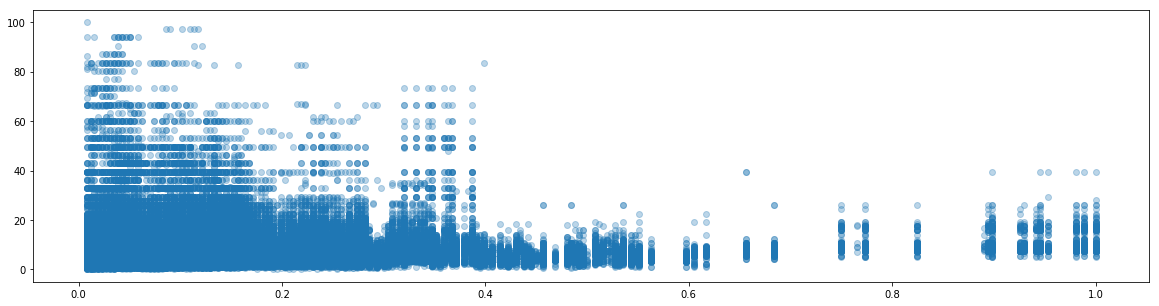

In [37]:
plt.clf()
plt.figure(figsize=(20,5))
plt.scatter(x=train_df.loc[:,'RentRoom'],y=train_df.loc[:,'Rental'],alpha=0.3)
plt.show()

## 楼层
根据数据来看中等楼层的租金要稍微高一点，但用XGB模型实测发现该特征重要性为零！该特征待处理。

          Rental          
            mean       std
Height                    
0       7.785228  5.963904
1       8.226252  6.834896
2       7.913312  6.247444


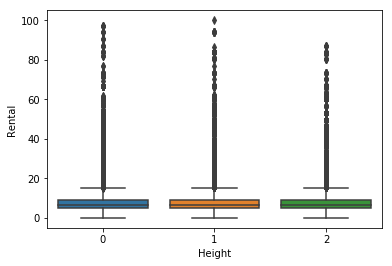

In [45]:
print(train_df.loc[:,['Height','Rental']].groupby(['Height']).agg(['mean','std']))
plt.clf()
sns.boxplot(x='Height',y='Rental',data=train_df)
plt.show()

## 楼层总高度

              Rental           
                mean        std
TolHeight                      
0.018182   36.656157  21.728559
0.909091   31.089351  15.477247
0.036364   24.533775  24.293980
0.945455   22.834685  16.820736
0.636364   22.018012  15.345143
0.963636   19.750990   3.534238
0.781818   19.347626  13.670670
0.800000   18.916987   6.590893
0.763636   18.577032  20.738318
0.872727   18.363945   8.699511


<Figure size 432x288 with 0 Axes>

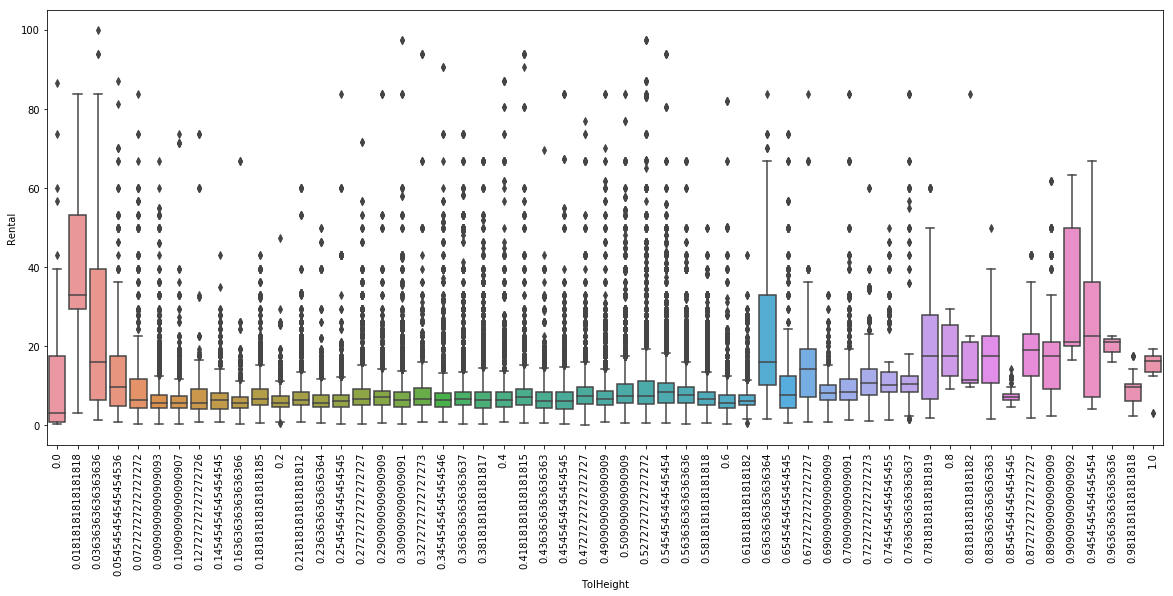

In [28]:
print(train_df.loc[:,['TolHeight','Rental']].groupby(['TolHeight']).agg(['mean','std']).sort_values(by=('Rental','mean'),ascending=False).head(10))

plt.clf()
plt.figure(figsize=(20,8))
sns.boxplot(x='TolHeight',y='Rental',data=train_df)
plt.xticks(rotation='90')
plt.show()

## 房子面积
原生最强特征

<Figure size 432x288 with 0 Axes>

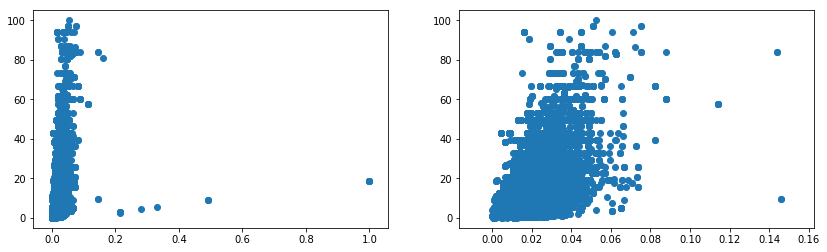

,Time,Neighborhood,RentRoom,Height,TolHeight,RoomArea,RoomDir,RentStatus,Bedroom,Livingroom,Bathroom,RentType,Region,BusLoc,SubwayLine,SubwaySta,SubwayDis,RemodCond,Rental
5789,1,4724,0.074219,1,0.563636,0.214499,E,NaN,2,2,1,NaN,8.0,133.0,NaN,NaN,NaN,NaN,3.225806
31724,1,4724,0.070312,1,0.563636,0.214499,E,NaN,2,2,1,NaN,8.0,133.0,NaN,NaN,NaN,NaN,3.225806
61440,2,4724,0.144531,1,0.563636,0.214499,E,NaN,2,2,1,NaN,8.0,133.0,NaN,NaN,NaN,NaN,3.225806
72710,2,4724,0.140625,1,0.563636,0.214499,E,NaN,2,2,1,NaN,8.0,133.0,NaN,NaN,NaN,NaN,2.886248
91336,2,4724,0.148438,1,0.563636,0.214499,E,NaN,2,2,1,NaN,8.0,133.0,NaN,NaN,NaN,NaN,2.546689
100648,2,17,0.335938,0,0.727273,1.000000,ES,NaN,1,1,1,NaN,11.0,55.0,5.0,113.0,0.364167,NaN,18.845501
105736,2,17,0.320312,0,0.727273,1.000000,ES,NaN,1,1,1,NaN,11.0,55.0,5.0,113.0,0.364167,NaN,18.845501
121873,2,1903,0.007812,1,0.054545,0.159881,E,NaN,1,0,1,NaN,0.0,109.0,NaN,NaN,NaN,NaN,81.154499
127221,3,17,0.339844,0,0.727273,1.000000,ES,NaN,1,1,1,NaN,11.0,55.0,5.0,113.0,0.364167,NaN,18.845501
150066,3,3946,0.050781,0,0.272727,0.330354,W,NaN,2,1,1,NaN,0.0,109.0,NaN,NaN,NaN,NaN,5.602716


In [68]:
plt.clf()
fig,axs=plt.subplots(1,2,figsize=(14,4))
axs[0].scatter(x=train_df.loc[:,'RoomArea'],y=train_df.loc[:,'Rental'])
axs[1].scatter(x=train_df[train_df.loc[:,'RoomArea']<0.15].loc[:,'RoomArea'],y=train_df[train_df.loc[:,'RoomArea']<0.15].loc[:,'Rental'])
plt.show()

train_df[train_df.loc[:,'RoomArea']>0.15]

In [63]:
test_df[test_df.loc[:,'Neighborhood']==6060]

,id,Time,Neighborhood,RentRoom,Height,TolHeight,RoomArea,RoomDir,RentStatus,Bedroom,Livingroom,Bathroom,RentType,Region,BusLoc,SubwayLine,SubwaySta,SubwayDis,RemodCond
42954,43969,4,6060,0.007812,2,0.309091,0.01291,ES,NaN,2,1,1,NaN,9.0,112.0,1.0,90.0,0.801667,NaN


由上图可以看出训练集中有明显的**杠杆支点**，会影响模型的预测，根据模型的线下表现考虑移除部分或全部移除。**Neighborhood=1903**确定为异常点。

## 朝向

                Rental           
                  mean        std
RoomDir                          
E S W        30.606575  28.031284
S W N        27.457941  18.718902
S WS W       19.573126   8.311509
N S          19.185059   0.000000
W WN         15.164998  20.030400
E W N        12.830463   3.336868
N W          12.393888        NaN
S N EN       12.393888        NaN
E ES S WS W  11.714771   1.358234
WS N         11.491377   8.016505


<Figure size 432x288 with 0 Axes>

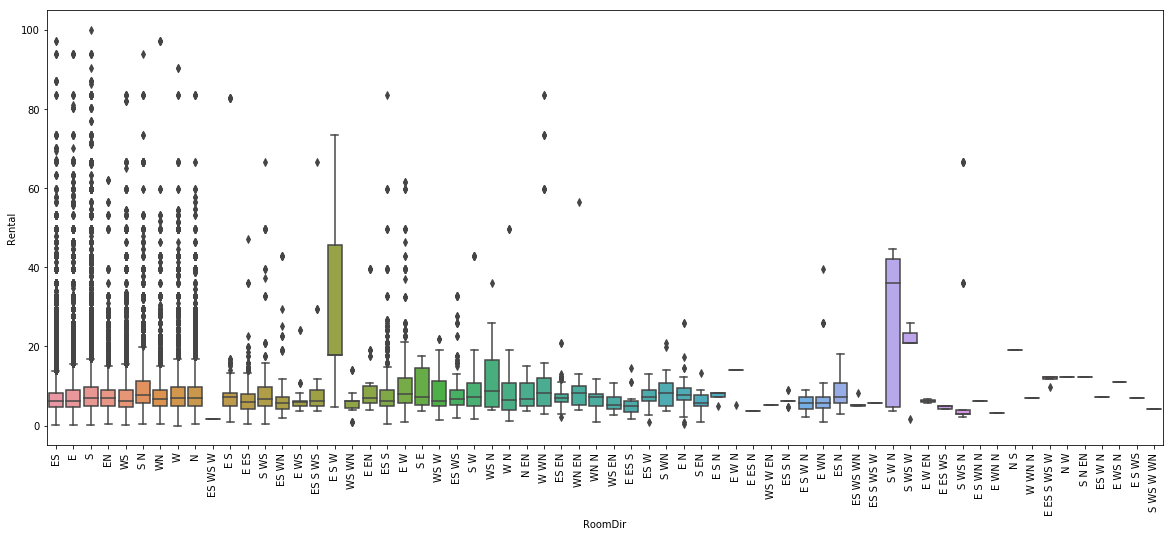

In [26]:
print(train_df.loc[:,['RoomDir','Rental']].groupby(['RoomDir']).agg(['mean','std']).sort_values(by=('Rental','mean'),ascending=False).head(10))

plt.clf()
plt.figure(figsize=(20,8))
sns.boxplot(x='RoomDir',y='Rental',data=train_df)
plt.xticks(rotation='90')
plt.show()

           Rental          
             mean       std
RoomDir                    
S        8.618269  7.113923
W        8.511880  7.165336
N        8.445846  6.163865
WN       8.265034  6.744522
EN       8.236689  6.243881
E        7.653534  5.933830
WS       7.542019  5.855688
ES       7.306105  5.440560


<Figure size 432x288 with 0 Axes>

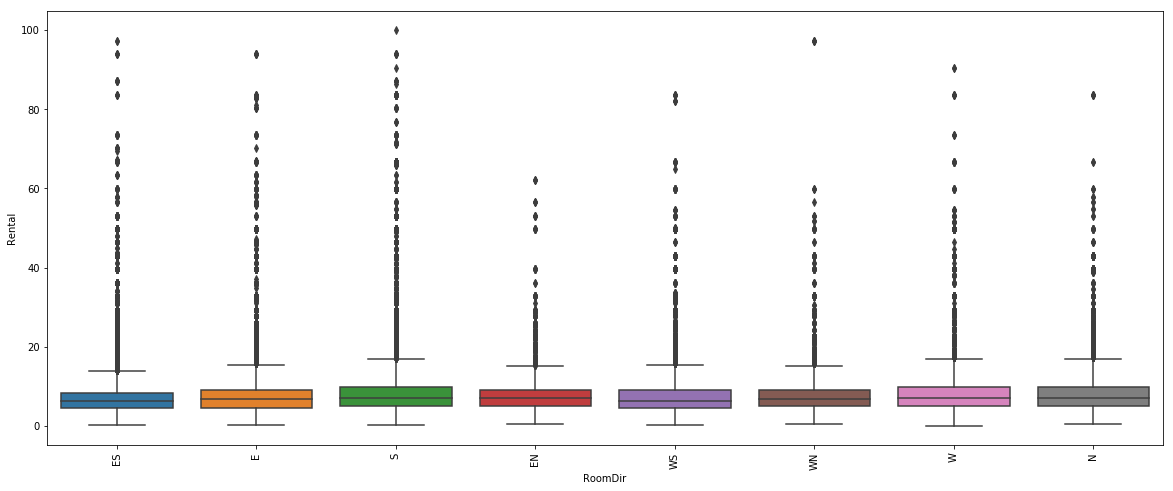

In [67]:
def ex_dir(direction):
    try:
        direction=direction.split(' ')[0]
    except Exception as e:
        pass
    return direction

tmp_train_df=train_df
tmp_train_df.loc[:,'RoomDir']=train_df.loc[:,'RoomDir'].apply(ex_dir)

print(tmp_train_df.loc[:,['RoomDir','Rental']].groupby(['RoomDir']).agg(['mean','std']).sort_values(by=('Rental','mean'),ascending=False).head(10))

plt.clf()
plt.figure(figsize=(20,8))
sns.boxplot(x='RoomDir',y='Rental',data=tmp_train_df)
plt.xticks(rotation='90')
plt.show()

## 出租状态

               Rental          
                 mean       std
RentStatus                     
2.0         10.020565  7.382067
1.0          8.227435  5.591589
3.0          7.128222  5.707782


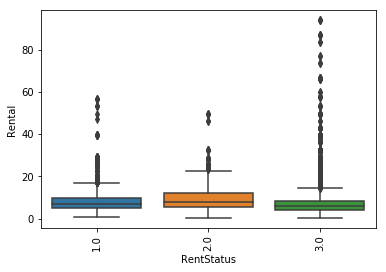

In [30]:
print(train_df.loc[:,['RentStatus','Rental']].groupby(['RentStatus']).agg(['mean','std']).sort_values(by=('Rental','mean'),ascending=False))

plt.clf()
sns.boxplot(x='RentStatus',y='Rental',data=train_df)
plt.xticks(rotation='90')
plt.show()

            Rental           
              mean        std
Bedroom                      
10       63.893605   9.703695
11       39.558574   0.000000
9        31.511210  28.778784
6        21.882312  20.367777
8        19.669430  10.441343
7        18.461406  16.061304
5        16.581532  17.065568
4        13.761365  12.570775
3         9.246102   6.575000
0         7.393116   8.194543
2         7.026731   3.655757
1         5.974477   4.876020


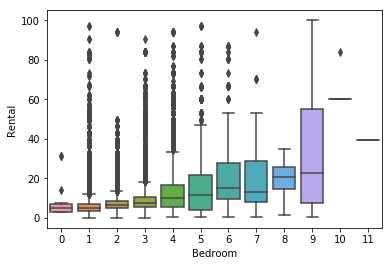

In [19]:
print(train_df.loc[:,['Bedroom','Rental']].groupby(['Bedroom']).agg(['mean','std']).sort_values(by=('Rental','mean'),ascending=False))

plt.clf()
sns.boxplot(x='Bedroom',y='Rental',data=train_df)
plt.show()

               Rental           
                 mean        std
Livingroom                      
4           34.345351  32.133829
3           26.424711  22.138966
5           26.315789   9.118340
2            9.414778   7.469209
8            8.319185   0.000000
1            7.242216   4.907467
0            5.304890   5.115676


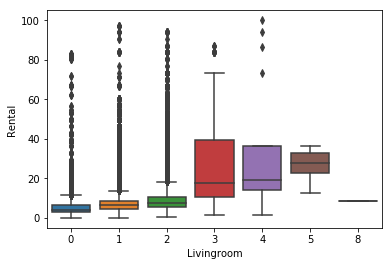

In [20]:
print(train_df.loc[:,['Livingroom','Rental']].groupby(['Livingroom']).agg(['mean','std']).sort_values(by=('Rental','mean'),ascending=False))

plt.clf()
sns.boxplot(x='Livingroom',y='Rental',data=train_df)
plt.show()

             Rental           
               mean        std
Bathroom                      
5         38.912107  25.075388
6         35.683611  29.515009
4         33.963816  22.608862
3         26.429094  19.987111
8         15.789474   0.000000
7         15.136476  19.342156
2         11.456724   8.300185
0          7.260881  10.920943
1          6.694448   3.644689


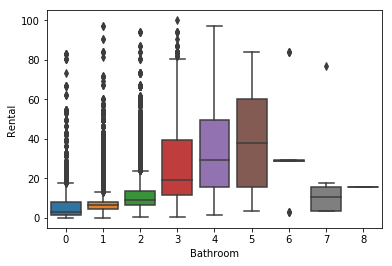

In [21]:
print(train_df.loc[:,['Bathroom','Rental']].groupby(['Bathroom']).agg(['mean','std']).sort_values(by=('Rental','mean'),ascending=False))

plt.clf()
sns.boxplot(x='Bathroom',y='Rental',data=train_df)
plt.show()

## 出租方式
是否整租，XGB判定重要性为零。

            Rental          
              mean       std
RentType                    
1.0       8.112104  6.189674
0.0       3.079372  1.637818


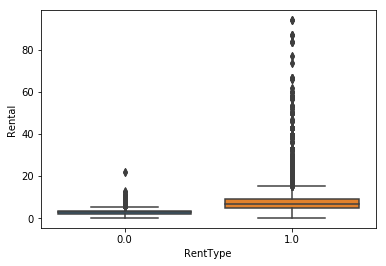

In [24]:
print(train_df.loc[:,['RentType','Rental']].groupby(['RentType']).agg(['mean','std']).sort_values(by=('Rental','mean'),ascending=False))

plt.clf()
sns.boxplot(x='RentType',y='Rental',data=train_df)
plt.show()

           Rental          
             mean       std
Region                     
12.0    10.870452  8.018467
6.0      9.785806  7.631230
10.0     9.484646  8.144410
11.0     7.738554  4.414553
1.0      7.064165  5.450880
3.0      6.609767  3.459995
9.0      6.354290  3.032584
13.0     5.822799  4.429989
0.0      5.322396  2.634246
7.0      5.054979  2.582632
14.0     4.645744  2.092216
8.0      4.595953  2.708194
4.0      4.017957  1.913192
2.0      3.565365  0.960417


<Figure size 432x288 with 0 Axes>

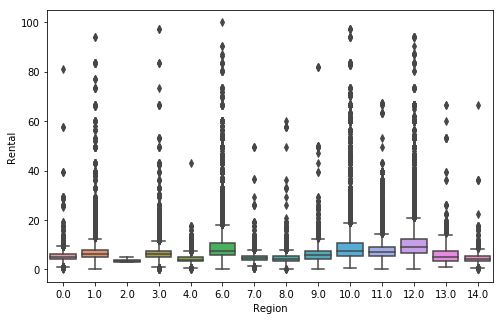

In [33]:
print(train_df.loc[:,['Region','Rental']].groupby(['Region']).agg(['mean','std']).sort_values(by=('Rental','mean'),ascending=False))

plt.clf()
plt.figure(figsize=(8,5))
sns.boxplot(x='Region',y='Rental',data=train_df)
plt.show()

           Rental           
             mean        std
BusLoc                      
149.0   66.723260        NaN
78.0    20.168554  13.607575
43.0    18.765384  13.585768
9.0     17.160575  10.686034
137.0   17.015706  11.867991
13.0    15.335068  10.620410
47.0    13.634874   9.117700
55.0    13.562821   8.442225
71.0    13.498303   9.078173
54.0    13.314041   8.510677


<Figure size 432x288 with 0 Axes>

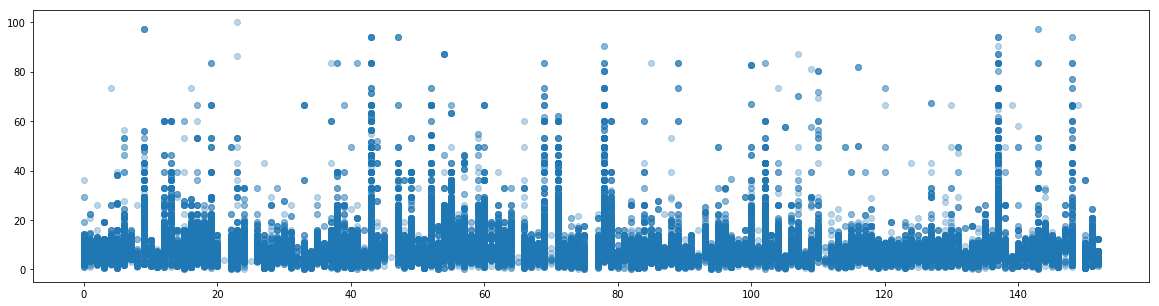

In [39]:
print(train_df.loc[:,['BusLoc','Rental']].groupby(['BusLoc']).agg(['mean','std']).sort_values(by=('Rental','mean'),ascending=False).head(10))

plt.clf()
plt.figure(figsize=(20,5))
plt.scatter(x=train_df.loc[:,'BusLoc'],y=train_df.loc[:,'Rental'],alpha=0.3)
plt.show()

               Rental          
                 mean       std
SubwayLine                     
5.0         11.146352  8.718824
4.0          9.731457  8.764236
1.0          8.073465  5.244439
3.0          7.494225  4.437085
2.0          6.993739  4.198830


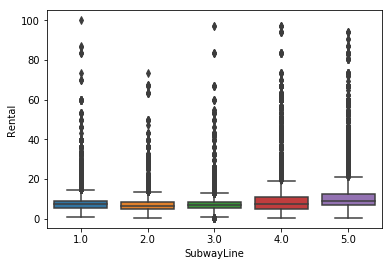

In [40]:
print(train_df.loc[:,['SubwayLine','Rental']].groupby(['SubwayLine']).agg(['mean','std']).sort_values(by=('Rental','mean'),ascending=False))

plt.clf()
sns.boxplot(x='SubwayLine',y='Rental',data=train_df)
plt.show()

              Rental           
                mean        std
SubwaySta                      
7.0        20.344602  15.902074
64.0       18.977537  13.677113
58.0       17.673183  10.120513
72.0       17.640688  12.383887
42.0       16.942243   6.577666
4.0        14.525998  10.637483
107.0      14.073282  11.143922
6.0        14.027618  10.986457
115.0      13.914778   8.009948
113.0      12.978488   7.504151


<Figure size 432x288 with 0 Axes>

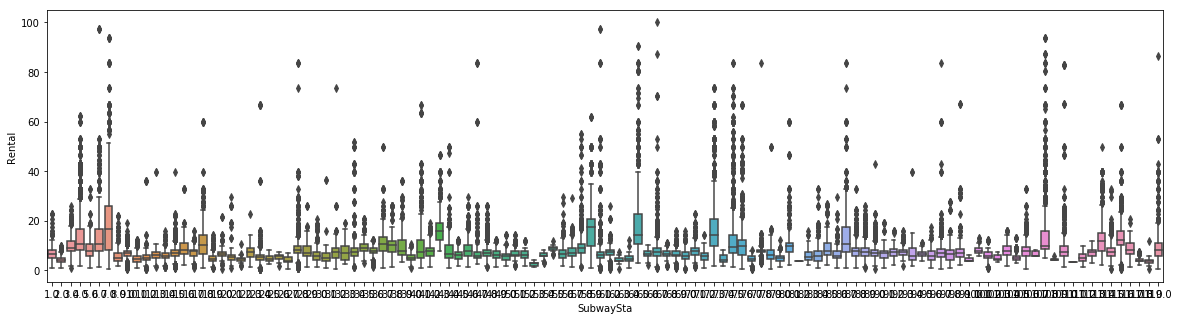

In [72]:
print(train_df.loc[:,['SubwaySta','Rental']].groupby(['SubwaySta']).agg(['mean','std']).sort_values(by=('Rental','mean'),ascending=False).head(10))

plt.clf()
plt.figure(figsize=(20,5))
sns.boxplot(x='SubwaySta',y='Rental',data=train_df)
plt.show()

<Figure size 432x288 with 0 Axes>

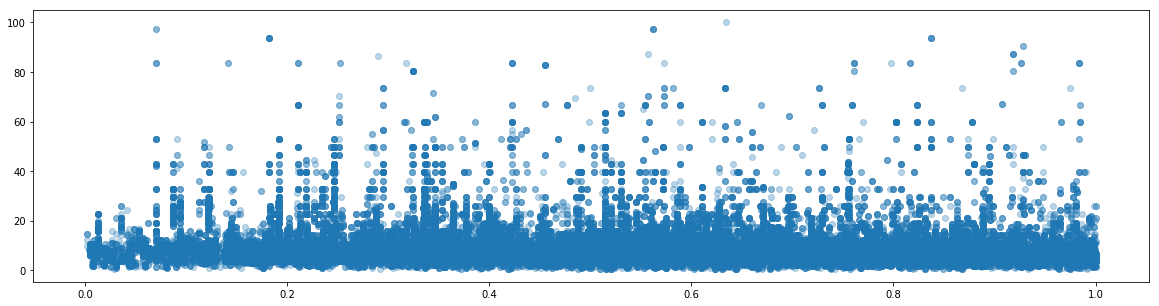

In [43]:
plt.clf()
plt.figure(figsize=(20,5))
plt.scatter(x=train_df.loc[:,'SubwayDis'],y=train_df.loc[:,'Rental'],alpha=0.3)
plt.show()

在EDA_distribution中注意到：SubwayLine、SubwaySta、SubwayDis的缺失数目相等，容易想到缺失的样本肯定是不在地铁线附近的房子。验证一下：

In [54]:
nonnull=len(train_df[~(train_df.loc[:,'SubwayLine'].isnull()) |
                     ~(train_df.loc[:,'SubwayLine'].isnull()) |
                     ~(train_df.loc[:,'SubwayLine'].isnull())])
assert nonnull==91778

nonnull=len(test_df[~(test_df.loc[:,'SubwayLine'].isnull()) |
                     ~(test_df.loc[:,'SubwayLine'].isnull()) |
                     ~(test_df.loc[:,'SubwayLine'].isnull())])
assert nonnull==26494

由此启发可以尝试做是否近地铁的特征。

## 装修状况

             Rental          
               mean       std
RemodCond                    
6.0        9.162428  6.486942
2.0        6.232687  4.433989
1.0        6.055995  6.829393
3.0        4.193866  0.461419
5.0        4.063384  0.514349
4.0        3.141606  0.557652


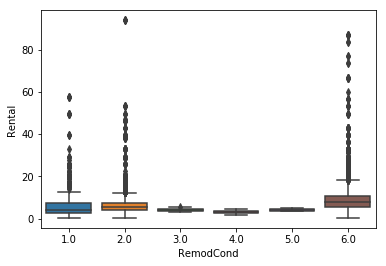

In [44]:
print(train_df.loc[:,['RemodCond','Rental']].groupby(['RemodCond']).agg(['mean','std']).sort_values(by=('Rental','mean'),ascending=False))

plt.clf()
sns.boxplot(x='RemodCond',y='Rental',data=train_df)
plt.show()